## APPLIED MACHINE LEARNING PROJECT

### Suhas Patil

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

### Import Data from files to Pandas Dataframe

In [2]:
Audit_Risk = pd.read_csv('audit_risk.csv')
Trials = pd.read_csv('trial.csv')

In [3]:
print(Audit_Risk.shape)
print(Trials.shape)

(776, 27)
(776, 18)


In [4]:
# Selecting columns with same name & values from both csv tables
Common_Cols=set(Audit_Risk.columns).intersection(set(Trials.columns))
Common_Cols

{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'}

In [5]:
# Merging the Audit_Risk and Trials based on common columns
Risk_data = Audit_Risk.merge(Trials, how = 'inner', on = ['History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'], sort = False)

Risk_data.head()
Risk_data.shape

(629, 35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231EA6717F0>,
      dtype=object)

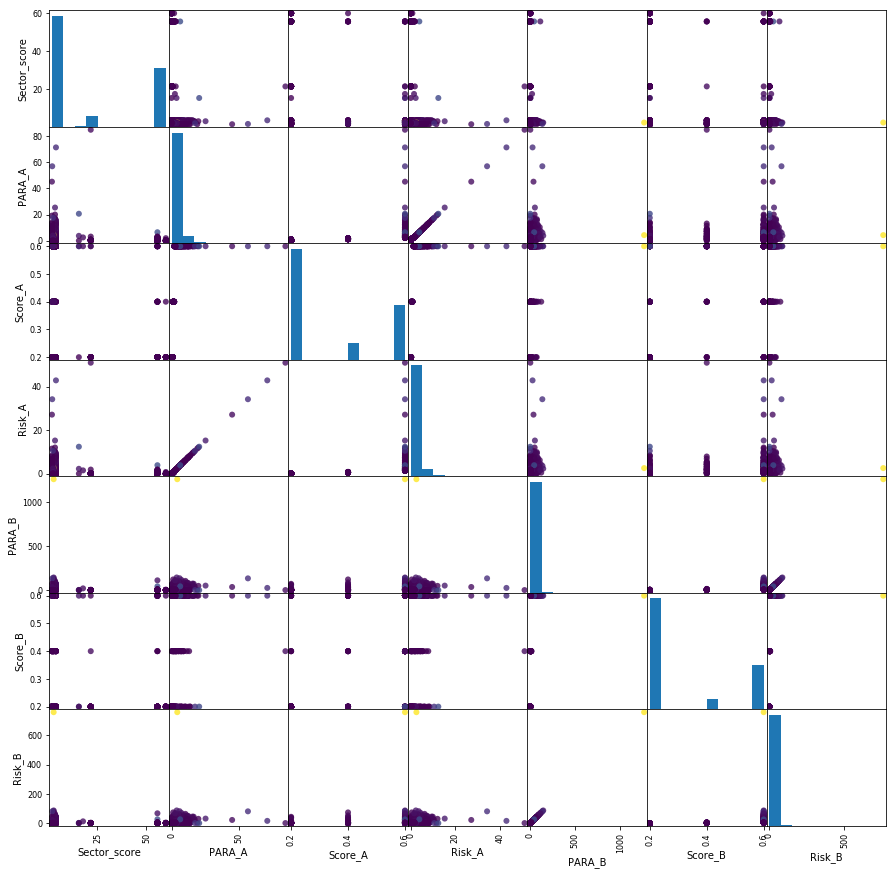

In [6]:
#Graphical exploration of data

%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = Risk_data.columns[:8]
scatter_matrix(Risk_data[attributes], figsize = (15,15),c=Risk_data['Audit_Risk'], alpha = 0.8, marker = 'O')

In [ ]:
#Checking correlation between the features
colormap = plt.cm.RdBu
plt.title('Pearson Corr.', y=1.05, size=12)
plt.figure(figsize= (15,15))
sns.heatmap(Risk_data.corr(),linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True))

In [8]:
Risk_data.corr()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1.000000,-0.244341,-0.462744,-0.244301,-0.159652,-0.354941,-0.157330,-0.182717,-0.190785,-0.217181,...,-0.111264,-0.510109,-0.462744,-0.354941,-0.217181,-0.389011,-0.155540,-0.128379,-0.132147,-0.162778
PARA_A,-0.244341,1.000000,0.524015,0.999460,0.157794,0.393414,0.157625,0.263090,0.129791,0.136845,...,0.216369,0.383510,0.524015,0.393414,0.136845,0.283638,0.134394,0.048668,0.046604,0.169173
Score_A,-0.462744,0.524015,1.000000,0.531303,0.286292,0.747852,0.284598,0.336559,0.287509,0.328258,...,0.230675,0.784906,1.000000,0.747852,0.328258,0.582575,0.156769,0.129771,0.130066,0.310560
Risk_A,-0.244301,0.999460,0.531303,1.000000,0.160045,0.396850,0.159864,0.265224,0.130208,0.137676,...,0.217444,0.385148,0.531303,0.396850,0.137676,0.285143,0.132753,0.047877,0.045316,0.171515
PARA_B,-0.159652,0.157794,0.286292,0.160045,1.000000,0.361286,0.999940,0.994088,0.202393,0.223443,...,0.887055,0.238326,0.286292,0.361286,0.223443,0.303650,0.077969,0.042934,0.040254,0.311136
Score_B,-0.354941,0.393414,0.747852,0.396850,0.361286,1.000000,0.362001,0.396800,0.292669,0.333048,...,0.215797,0.696150,0.747852,1.000000,0.333048,0.613095,0.011184,0.113874,0.106356,0.327010
Risk_B,-0.157330,0.157625,0.284598,0.159864,0.999940,0.362001,1.000000,0.994008,0.202146,0.223155,...,0.886818,0.236471,0.284598,0.362001,0.223155,0.302130,0.078010,0.043172,0.040524,0.310998
TOTAL,-0.182717,0.263090,0.336559,0.265224,0.994088,0.396800,0.994008,1.000000,0.210004,0.230664,...,0.887373,0.274462,0.336559,0.396800,0.230664,0.326728,0.089218,0.047428,0.044586,0.320876
numbers,-0.190785,0.129791,0.287509,0.130208,0.202393,0.292669,0.202146,0.210004,1.000000,0.906225,...,0.215413,0.288779,0.287509,0.292669,0.906225,0.440302,0.121201,-0.006112,0.032770,0.202007
Score_B.1,-0.217181,0.136845,0.328258,0.137676,0.223443,0.333048,0.223155,0.230664,0.906225,1.000000,...,0.254326,0.333936,0.328258,0.333048,1.000000,0.502720,0.147371,-0.000088,0.033504,0.241330


#### After Careful analysis of the features and their correlation matrices, we can see that all the features of the trials csv are either same as the columns in the Audit Risk table or are derived / highly correlated with the features of the Audit Risk table. 
#### The highly correlated data will provide same information and will not be helpful in developing machine learning models. Hence, we can remove the columns of the Trails table and the features which are highly correlated among eachothers.

Also, after going through the original published paper related to the data handed, we can see that
Score_A in Audit_Risk multiplied by 10 is the Score_A in trial. 
The same applies to Score_B. Audit_Risk dataset contains 
PROB in Audit_Risk multiplied by 10 is the Loss_Score in trial. 
prob in Audit_Risk multiplied by 10 is the History_Score in trial. 
Score is exactly identical in both Audit_risk and trial datasets. 
Risk_A (calculated from  PARA_A and Score_A) and Risk_B(calculated from  PARA_B and Score_B) which are not present in trial. TOTAL and numbers columns are identical in Audit_Risk and trial. 
Score_B.1 multiplied by 10 is the Marks column in trial. Audit_Risk has an extra column Risk_C(calculated from  numbers and Score_B.1) compared to trial. 
Score_MV in Audit_Risk multiplied by 10 is the Money_Marks column in trial dataset. Risk_D (calculated from Money_Value and Score_MV) is absent in trial. 
Risk column in trial is calculated based on Score value. If Score value is greater than 2, Risk value = 1 else Risk = 0 (No Risk) 

In [9]:
Risk_data=Audit_Risk
Risk_data=Risk_data.drop_duplicates(keep='first')

In [10]:
Risk_data = Risk_data[['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Money_Value', 'District_Loss', 'PROB', 'History', 'Prob', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk','Audit_Risk', 'Risk']]

In [11]:
Risk_data.shape

(763, 17)

In [12]:
Risk_data.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
PARA_B            False
TOTAL             False
numbers           False
Money_Value        True
District_Loss     False
PROB              False
History           False
Prob              False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [13]:
#Removing the string value rows in the LOCATION_ID column

Risk_data = Risk_data[Risk_data['LOCATION_ID']!='LOHARU']
Risk_data = Risk_data[Risk_data['LOCATION_ID']!='NUH']
Risk_data = Risk_data[Risk_data['LOCATION_ID']!='SAFIDON']

In [14]:
#Converting the LOCATION_ID column with replaced string values to an int column
Risk_data['LOCATION_ID'] = Risk_data['LOCATION_ID'].astype(int)

In [15]:
#Imputing the missing value in the Money_Value column
Risk_data['Money_Value'] = Risk_data['Money_Value'].replace('', np.nan)
Risk_data['Money_Value'] = Risk_data['Money_Value'].replace(np.nan,Risk_data.Money_Value.mean())

In [16]:
#Checking if the null values in Money_Value are replaced
Risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 17 columns):
Sector_score      760 non-null float64
LOCATION_ID       760 non-null int32
PARA_A            760 non-null float64
PARA_B            760 non-null float64
TOTAL             760 non-null float64
numbers           760 non-null float64
Money_Value       760 non-null float64
District_Loss     760 non-null int64
PROB              760 non-null float64
History           760 non-null int64
Prob              760 non-null float64
Score             760 non-null float64
Inherent_Risk     760 non-null float64
CONTROL_RISK      760 non-null float64
Detection_Risk    760 non-null float64
Audit_Risk        760 non-null float64
Risk              760 non-null int64
dtypes: float64(13), int32(1), int64(3)
memory usage: 103.9 KB


In [17]:
#Checking for outliers in the Risk_data dataframe for deciding on the type of scaling to be used
from numpy import mean
from numpy import std

for i in Risk_data:
    data_mean, data_std = mean(Risk_data[i]), std(Risk_data[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in Risk_data[i] if x < lower or x > upper]
    print('Identified outliers in ' + i + ': %d' % len(outliers))

Identified outliers in Sector_score: 0
Identified outliers in LOCATION_ID: 0
Identified outliers in PARA_A: 7
Identified outliers in PARA_B: 1
Identified outliers in TOTAL: 2
Identified outliers in numbers: 22
Identified outliers in Money_Value: 6
Identified outliers in District_Loss: 0
Identified outliers in PROB: 22
Identified outliers in History: 15
Identified outliers in Prob: 15
Identified outliers in Score: 0
Identified outliers in Inherent_Risk: 7
Identified outliers in CONTROL_RISK: 15
Identified outliers in Detection_Risk: 0
Identified outliers in Audit_Risk: 6
Identified outliers in Risk: 0


In [18]:
Risk_data.var()

Sector_score       583.426956
LOCATION_ID         98.722356
PARA_A              32.811037
PARA_B            2558.747544
TOTAL             2684.827394
numbers              0.071309
Money_Value       4519.845133
District_Loss        1.520311
PROB                 0.001436
History              0.287704
Prob                 0.004714
Score                0.743221
Inherent_Risk     3054.019796
CONTROL_RISK         0.200705
Detection_Risk       0.000000
Audit_Risk        1525.693007
Risk                 0.240316
dtype: float64

#### Removing outliners from the features with high variance

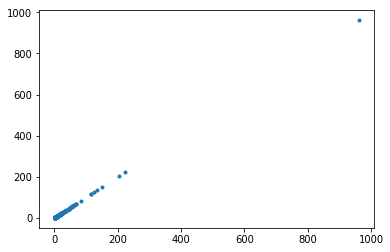

In [19]:
plt.plot(Risk_data['Audit_Risk'],Risk_data['Audit_Risk'],'.')

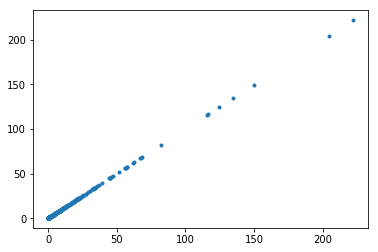

In [20]:
Risk_data=Risk_data[abs(Risk_data['Audit_Risk'])<400]
plt.plot(Risk_data['Audit_Risk'],Risk_data['Audit_Risk'],'.')

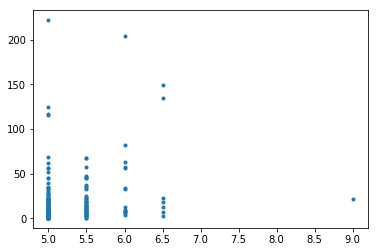

In [21]:
plt.plot(Risk_data['numbers'],Risk_data['Audit_Risk'],'.')

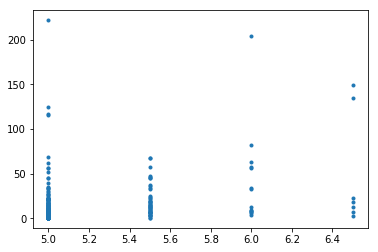

In [22]:
Risk_data=Risk_data[abs(Risk_data['numbers'])<7]
plt.plot(Risk_data['numbers'],Risk_data['Audit_Risk'],'.')

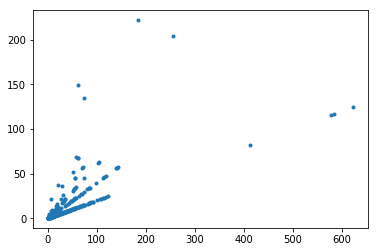

In [23]:
plt.plot(Risk_data['Inherent_Risk'],Risk_data['Audit_Risk'],'.')

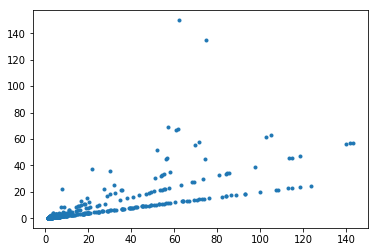

In [24]:
Risk_data=Risk_data[abs(Risk_data['Inherent_Risk'])<175]
plt.plot(Risk_data['Inherent_Risk'],Risk_data['Audit_Risk'],'.')

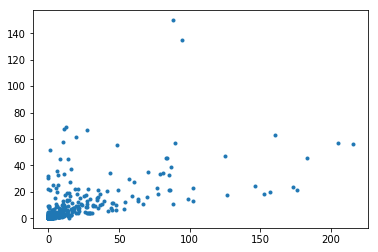

In [25]:
plt.plot(Risk_data['Money_Value'],Risk_data['Audit_Risk'],'.')

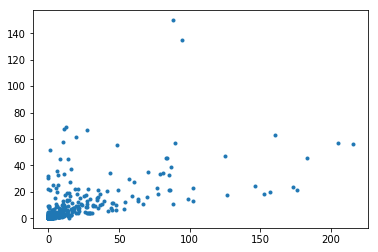

In [26]:
Risk_data=Risk_data[abs(Risk_data['Money_Value'])<250]
plt.plot(Risk_data['Money_Value'],Risk_data['Audit_Risk'],'.')

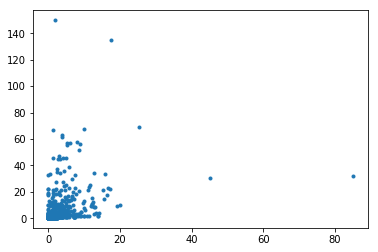

In [27]:
plt.plot(Risk_data['PARA_A'],Risk_data['Audit_Risk'],'.')

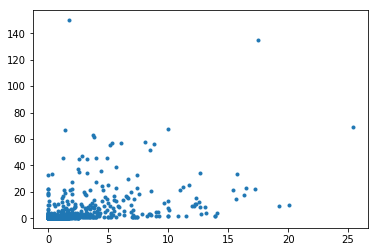

In [28]:
Risk_data=Risk_data[abs(Risk_data['PARA_A'])<40]
plt.plot(Risk_data['PARA_A'],Risk_data['Audit_Risk'],'.')

In [29]:
Risk_data.shape

(750, 17)

In [30]:
# Removing nominal features and selecting features for classification models
Risk_data_class = Risk_data[['Sector_score','numbers','PARA_A', 'PARA_B',
       'TOTAL','Money_Value', 'PROB', 'District_Loss','History', 'Score', 'Risk']]

In [31]:
# Removing nominal features and selecting features for regression models
Risk_data = Risk_data[['Sector_score','numbers','PARA_A', 'PARA_B',
       'TOTAL','Money_Value', 'PROB', 'District_Loss','History', 'Score', 'Audit_Risk']]

####  Seperating the target column from the data set

In [32]:
y = Risk_data['Audit_Risk']
X = Risk_data.drop(['Audit_Risk'], axis = 1)

#### Splitting the dataframe into Training and Testing data (defaut split)

In [33]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Scaling the data using Normalisation Z scores

#### Standardscaler:
#### Assumes that data has normally distributed features and will scale them to zero mean and 1 standard deviation. After applying the scaler all features will be of same scale .

#### Minmaxscaler shrinks the data within the range of -1 to 1(if there are negative values)

#### Since our data distribution is Guassian, standard deviation is high, with significant number of outliers, we use the standard  scaler for the models. The models which expect normalisation work well only with standard scaler.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

### Simple Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))

Train score: 0.8549
Test score: 0.7210


Text(0.5,0,'RM')

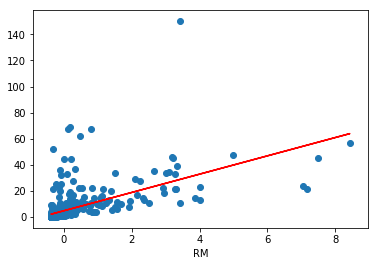

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

Text(0.5,0,'RM')

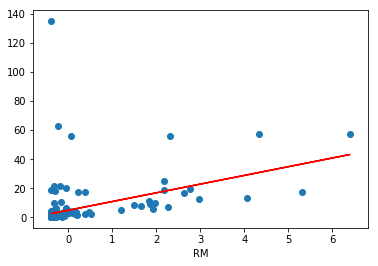

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

X_test_rm = X_test[:,3].reshape(-1,1)
lreg.fit(X_test_rm, y_test)
y_predict = lreg.predict(X_test_rm)

plt.plot(X_test_rm, y_predict, c = 'r')
plt.scatter(X_test_rm,y_test)
plt.xlabel('RM')

### Ridge Linear Regression

In [38]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100,250,500,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.8547090014261867, 0.8539913498642967, 0.8537388613924608, 0.8533213236196113, 0.8368322025813342, 0.802626801549911, 0.7503204252029569, 0.6649726367442614]
[0.7135378331931241, 0.6987351137076895, 0.6941175746033271, 0.6925809729278578, 0.6752273896379498, 0.6450639912413481, 0.6003821739295865, 0.5281441120275868]


Text(0.5,0,'$\\alpha$')

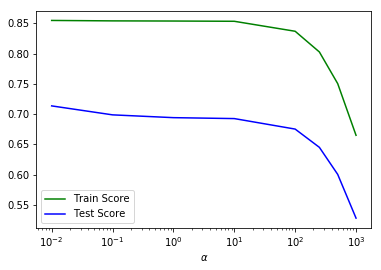

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

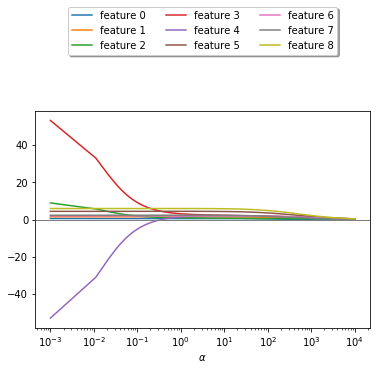

In [40]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,9):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [41]:
#GRID SEARCH WITH CROSS VALIDATION:

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state = 0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

x_range = [0.01, 0.1, 1, 10, 100,250,500]
best_score = 0
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    score = ridge.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'x': alpha}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
best = best_parameters['x']

ridge = Ridge(best)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 421   size of validation set: 141   size of test set: 188

Best score on validation set: 0.82
Best parameters:  {'x': 100}
Test set score with best parameters: 0.71


In [42]:
from sklearn.model_selection import GridSearchCV
params={'alpha': [0.01, 0.1, 1, 10, 100]}
rdg_reg = Ridge()
grid_search = GridSearchCV(rdg_reg, params,cv=5,verbose = 1,return_train_score=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [43]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.79


In [44]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002593,0.000798,0.000399,0.000488,0.01,{'alpha': 0.01},0.838915,0.775991,0.688133,0.862197,...,0.778204,0.065753,3,0.853023,0.859980,0.869626,0.849542,0.898096,0.866053,0.017429
1,0.001197,0.000399,0.000598,0.000489,0.1,{'alpha': 0.1},0.839634,0.778050,0.680154,0.879173,...,0.779646,0.073235,2,0.852543,0.859521,0.869312,0.848505,0.897348,0.865446,0.017443
2,0.001995,0.000631,0.000399,0.000489,1,{'alpha': 1},0.838418,0.784355,0.651485,0.907131,...,0.776175,0.092195,4,0.842997,0.849943,0.863401,0.833086,0.887353,0.855356,0.018796
3,0.001795,0.000399,0.000399,0.000488,10,{'alpha': 10},0.850945,0.811893,0.709640,0.903688,...,0.786165,0.091572,1,0.823362,0.829289,0.847708,0.811023,0.872417,0.836760,0.021396
4,0.001795,0.000399,0.000599,0.000489,100,{'alpha': 100},0.844829,0.804535,0.810719,0.857749,...,0.764159,0.132374,5,0.737316,0.744335,0.736773,0.722821,0.818920,0.752033,0.034164


### Lasso Linear Regression

In [45]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[0.8532459424809379, 0.823557648290587, 0.7668006001578256, 0.5356347566423092, 0.3435318618196077]
[0.5830153112928639, 0.5867480397990819, 0.6928072305714721, 0.5049924320905549, 0.30644153476063696]


C:\Users\speed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5,0,'$\\alpha$')

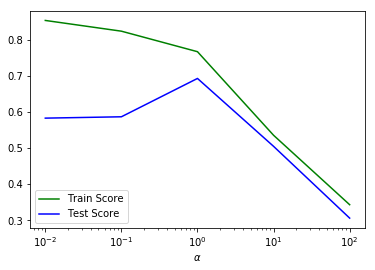

In [46]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

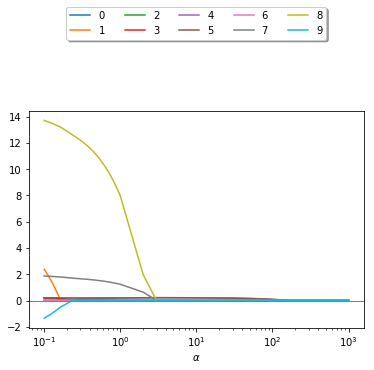

In [47]:
%matplotlib inline

x_range1 = np.linspace(0.1, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = i)

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=5, fancybox=True, shadow=True)
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
params={'alpha': [0.01, 0.1, 1, 10, 100]}
lso_reg = Lasso()
grid_search = GridSearchCV(lso_reg, params,cv=5,verbose = 1,return_train_score=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\speed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\speed\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [49]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.78


In [50]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005382,0.001622,0.000000,0.000000,0.01,{'alpha': 0.01},0.844296,0.782731,0.674356,0.874934,...,0.780338,0.073896,1,0.852522,0.858437,0.868544,0.847693,0.890950,0.863629,0.015329
1,0.001391,0.000500,0.000406,0.000497,0.1,{'alpha': 0.1},0.853277,0.811816,0.625980,0.898197,...,0.772281,0.105359,2,0.822061,0.827516,0.849510,0.808672,0.868379,0.835228,0.021171
2,0.001599,0.000492,0.000198,0.000395,1,{'alpha': 1},0.871021,0.834720,0.801817,0.887114,...,0.760504,0.179207,3,0.768972,0.776122,0.787046,0.756550,0.770512,0.771840,0.009933
3,0.001409,0.000493,0.000190,0.000381,10,{'alpha': 10},0.735482,0.693478,0.631258,0.725445,...,0.621388,0.154881,4,0.510109,0.520201,0.519660,0.493909,0.709778,0.550732,0.080090
4,0.001009,0.000017,0.000397,0.000486,100,{'alpha': 100},0.542059,0.536663,0.414420,0.382436,...,0.407019,0.140070,5,0.329121,0.357702,0.329912,0.306333,0.421312,0.348876,0.039711


### Polynomial Regression

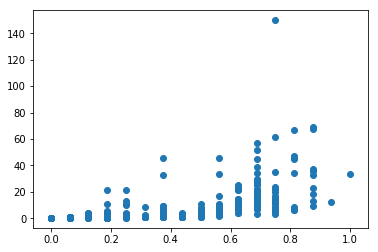

In [51]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
#X = merged[['Sector_score', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'District_Loss','PROB','History','Score']]
#y = merged ['Audit_Risk']
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)
X_train_1 = X_train[:,9].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [52]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [53]:
print(train_score_list)
print(test_score_list)

[0.8549136294903477, 0.9974723467811702]
[0.7406840429805046, 0.9226996340098653]


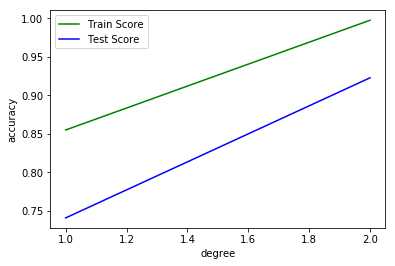

In [54]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

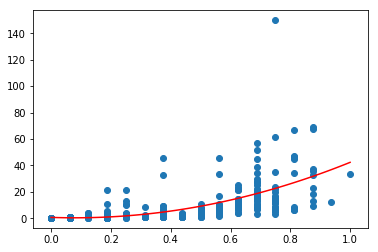

In [55]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,9].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

### K Nearest Neighbor Regression

Text(0,0.5,'MSE')

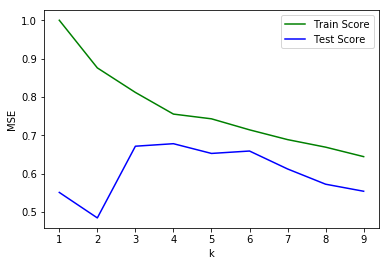

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [57]:
print(train_score_array)
print(test_score_array)

[1.0, 0.8757486870965162, 0.8118047278636737, 0.7553264753848205, 0.7429902621320862, 0.7142719889030653, 0.6887911625185803, 0.6691105409643963, 0.6444061632769378]
[0.551086157379641, 0.48462527031827346, 0.6715679055384336, 0.6781182345251935, 0.6527449504807896, 0.6590197293169657, 0.6122714218140524, 0.5725161521996184, 0.5541449344606442]


In [58]:
param_grid_knn = {
            'leaf_size' : range(1,50),
            'n_neighbors' : range(1,50),
            'p': [1,2],
            'weights': ['distance','uniform'],
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn , return_train_score=True, verbose = 1, n_jobs = -1)
CV_knn.fit(X_train, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

Fitting 3 folds for each of 9604 candidates, totalling 28812 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1019 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 3019 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 5819 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 9419 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 13819 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 19019 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 25019 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 28812 out of 28812 | elapsed:  1.7min finished


{'leaf_size': 1, 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


In [59]:
# convert to DataFrame
results = pd.DataFrame(CV_knn.cv_results_)
# show the first 5 rows
display(results.head(10))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000998,4.495664e-07,0.002659,4.701915e-04,1,1,1,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.561890,0.426259,0.332399,0.440399,0.094261,8723,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001288,4.730899e-04,0.001994,4.899036e-07,1,1,1,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'we...",0.561890,0.426259,0.332399,0.440399,0.094261,8723,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000998,1.236308e-06,0.006316,9.404929e-04,1,1,2,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.500167,0.600631,0.277238,0.459418,0.135034,7155,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.001330,4.701341e-04,0.006649,4.701903e-04,1,1,2,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'we...",0.500167,0.600631,0.277238,0.459418,0.135034,7155,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.001662,4.701903e-04,0.004322,4.702465e-04,1,2,1,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.696806,0.608076,0.443712,0.583067,0.104868,883,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.001330,4.705274e-04,0.003656,4.698531e-04,1,2,1,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'we...",0.701188,0.608778,0.444917,0.585168,0.105988,785,0.870572,0.911837,0.906993,0.896467,0.018417
6,0.001662,4.701903e-04,0.007646,4.700779e-04,1,2,2,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'we...",0.740902,0.674422,0.455491,0.623814,0.121925,148,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.001330,4.699093e-04,0.008311,4.700779e-04,1,2,2,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'we...",0.738159,0.665940,0.463153,0.622623,0.116411,197,0.871830,0.890568,0.914006,0.892135,0.017254
8,0.000997,2.973602e-07,0.004987,1.946680e-07,1,3,1,distance,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'we...",0.704001,0.576307,0.435108,0.572041,0.109865,1275,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.001330,4.701903e-04,0.005651,9.402119e-04,1,3,1,uniform,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'we...",0.696715,0.575160,0.431710,0.568091,0.108351,1373,0.800951,0.794140,0.833701,0.809597,0.017269


### Support Vector Regression

In [60]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score 
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
pred = svr_lin.fit(X_train, y_train).predict(X_test)

print(r2_score(y_test,pred))
print("Coefficient shape: ", svr_lin.coef_.shape)
print("Intercept shape: ", svr_lin.intercept_.shape)

0.5843928419514645
Coefficient shape:  (1, 10)
Intercept shape:  (1,)


### Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

tree = DecisionTreeRegressor().fit(X_train, y_train)

pred_tree = tree.predict(X_test)
print("R Squared Value : ", r2_score(y_test,pred_tree))

R Squared Value :  0.39844039359719163


#### Polynomial Regression with second degree gives the best accuracy of 92% among all the regression models on the test data, followed by decision tree regressor 88%.

# Classification Models

####  Seperating the target column from the data set

In [62]:
y = Risk_data_class['Risk']
X = Risk_data_class.drop(['Risk'], axis = 1)

#### Splitting the dataframe into Training and Testing data (defaut split)

In [63]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Scaling the data using Normalisation Z scores

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

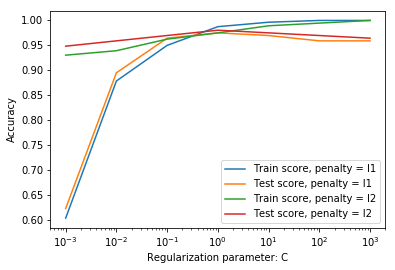

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

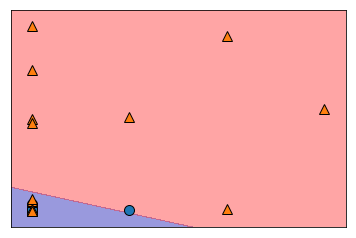

In [67]:
%matplotlib inline
import mglearn
X_b = X_train[10:50, [1,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
#X = merged[['Sector_score', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value', 'District_Loss','PROB','History','Score']]
#y = merged ['Risk']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)

pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, pred)))

Accuracy: 0.979
Confusion matrix:
[[115   2]
 [  2  69]]
Recall score:0.972
Precision score: 0.972
ROC AUC score: 0.977


### K Nearest Neighbor Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

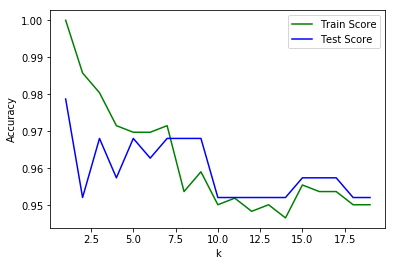

In [70]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [71]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))


pred = knn.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, pred)))

Train score: 0.9502
Test score: 0.9521
Accuracy: 0.952
Confusion matrix:
[[116   1]
 [  8  63]]
Recall score:0.887
Precision score: 0.984
ROC AUC score: 0.939


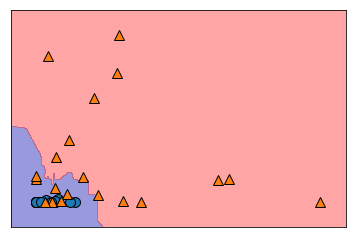

In [72]:
import mglearn
X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]

knn = KNeighborsClassifier(10)
knn.fit(X_b, y_b) 

mglearn.plots.plot_2d_separator(knn, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

### Support Vector Classifier

In [73]:
from sklearn.svm import LinearSVC


linear_svm = LinearSVC().fit(X_train, y_train)
pred=linear_svm.predict(X_test)

print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))
print("Recall score:{:.3f}".format(recall_score(y_test, pred)))
print("Precision score: {:.3f}".format(precision_score(y_test, pred)))
print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, pred)))

Coefficient shape:  (1, 10)
Intercept shape:  (1,)
Accuracy: 0.984
Confusion matrix:
[[115   2]
 [  1  70]]
Recall score:0.986
Precision score: 0.972
ROC AUC score: 0.984


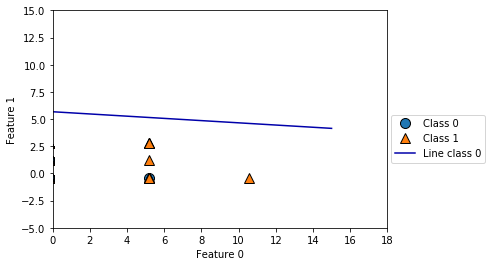

In [74]:
%matplotlib inline
mglearn.discrete_scatter(X_train[:, 6], X_train[:, 7], y_train)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-5, 15)
plt.xlim(0, 18)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Line class 0'], loc=(1.01, 0.3))


### SVC with kernel trick

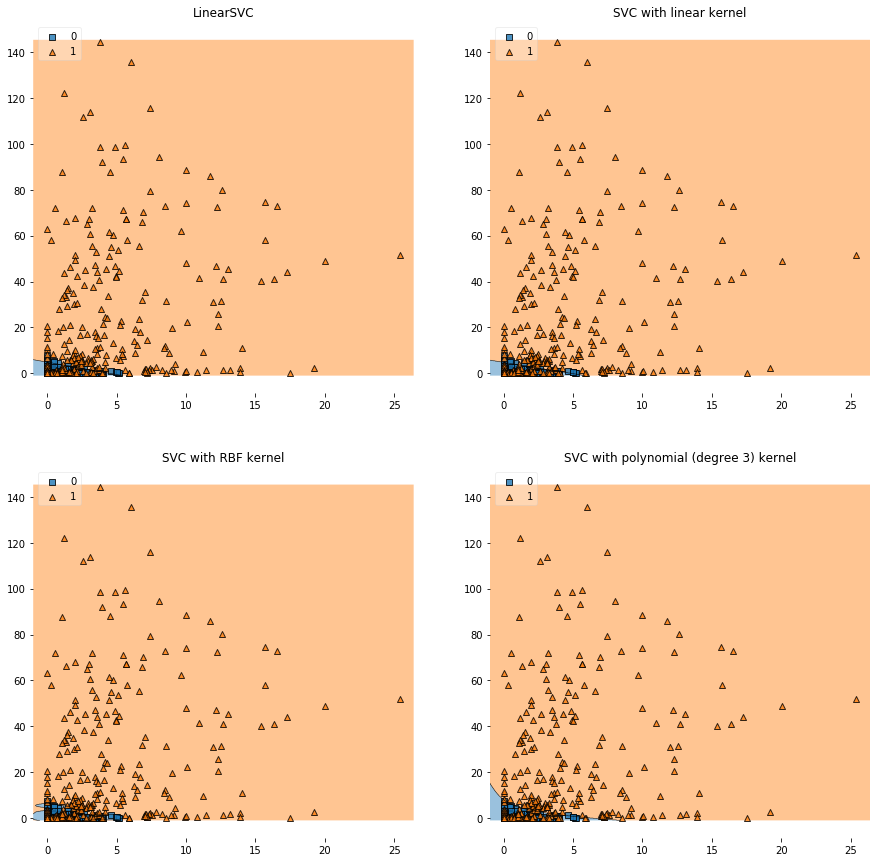

In [75]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools


y1 = np.array(Risk_data_class['Risk'])
X1= np.array(Risk_data_class[['PARA_A', 'PARA_B']])

C = 1
clf1 = LinearSVC(C=C)
clf2 = SVC(kernel='linear', C=C)
clf3 = SVC(kernel='rbf', gamma=0.7, C=C)
clf4 = SVC(kernel='poly', degree=3, C=C)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15,15))

labels = ['LinearSVC',
          'SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X1, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1, y=y1,clf=clf, legend=2)
    plt.title(lab)
    

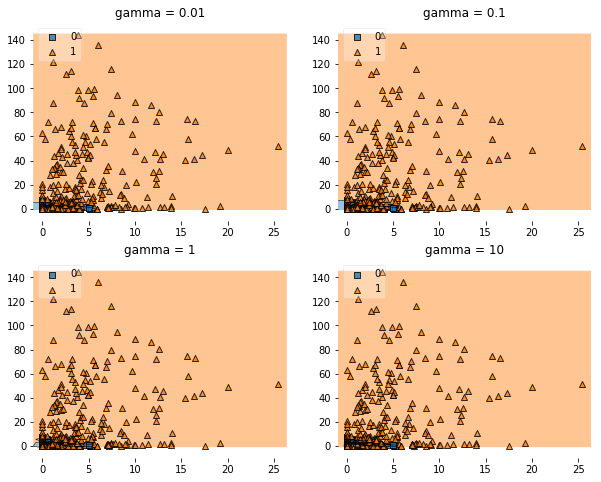

In [76]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

C = 1
clf1 = SVC(kernel='rbf', gamma=0.01, C=C)
clf2 = SVC(kernel='rbf', gamma=0.1, C=C)
clf3 = SVC(kernel='rbf', gamma=1, C=C)
clf4 = SVC(kernel='rbf', gamma=10, C=C)


models = (SVC(kernel='rbf', gamma=0.01, C=1),
         SVC(kernel = 'rbf', gamma = 0.1, C = 1),
         SVC(kernel = 'rbf', gamma = 1, C = 1),
         SVC(kernel = 'rbf', gamma = 10, C = 1))


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['gamma = 0.01',
          'gamma = 0.1',
          'gamma = 1',
          'gamma = 10']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X1, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1, y=y1,clf=clf, legend=2)
    plt.title(lab)

### Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.947


In [78]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.947


### Support Vector Classifier

In [79]:
from sklearn.svm import SVC

print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 562   size of test set: 188
Best score: 0.99
Best parameters: {'C': 100, 'gamma': 0.01}


#### All classification models perform well on the test data with accuracy scores above 95%, SVC model gives the best results.